## Lung Disease Predictive Analysis 肺部疾病預測分析  
參考資料1:https://www.kaggle.com/code/devraai/lung-disease-predictive-analysis/notebook  
參考資料2:https://www.kaggle.com/datasets/samikshadalvi/lungs-diseases-dataset


## Step1 導入相關套件

In [97]:

import warnings
warnings.filterwarnings("ignore")

# 數據處理套件
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 機器學習模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# 視覺化套件
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

plt.switch_backend('Agg')

%matplotlib inline

# 設定圖表樣式-淺色背景+網格線、柔和色彩、放大圖表字體
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## Step2 載入資料

Dataset Head:


,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes



Missing Values Count:


Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

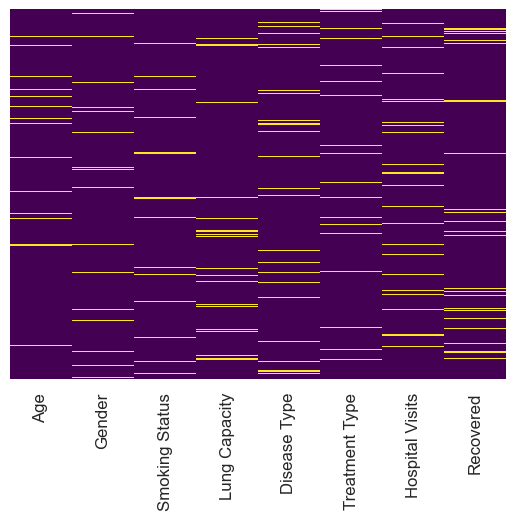

In [98]:
# 讀取資料
file_path = 'lung_disease_data.csv'
df = pd.read_csv(file_path, encoding='ascii')

# 列出讀取的資料
print('Dataset Head:')
display(df.head())
# 列出各欄位空值的數量
print('\nMissing Values Count:')
display(df.isnull().sum())

# 用heatmap(.isnull()來找出缺失的資料在哪些欄位。
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# Step3 資料清理

* 將空值填補成自定義的資料:  
  'Age','Lung Capacity','Hospital Visits'預設中位數  
  'Gender'預設'Female'  
  'Smoking Status'預設'Yes'  
  'Disease Type'預設'Bronchitis'  
  'Treatment Type'預設'Medication'  
  'Recovered'預設'Yes' 

Filled missing values in Age with median value 54.0
Filled missing values in Lung Capacity with median value 3.48
Filled missing values in Hospital Visits with median value 8.0
Filled missing values in Gender with mode value 'Female'
Filled missing values in Smoking Status with mode value 'Yes'
Filled missing values in Disease Type with mode value 'Bronchitis'
Filled missing values in Treatment Type with mode value 'Medication'
Filled missing values in Recovered with mode value 'Yes'
    Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes           3.48   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD     Medication   
3  40.0  Female            Yes           3.48   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  Recovered_binary  

Age                0
Lung Capacity      0
Hospital Visits    0
Gender             0
Smoking Status     0
Disease Type       0
Treatment Type     0
Recovered          0
dtype: int64

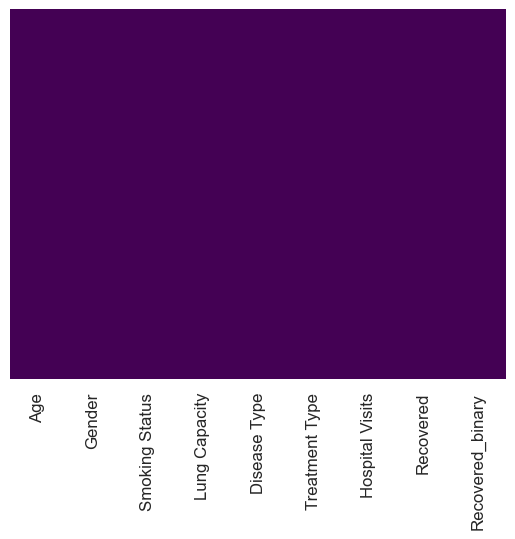

In [99]:
# 列出數值類型跟類別類型的欄位
numeric_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']

# 填補數值類型的欄位
for col in numeric_cols:
    if df[col].isnull().sum() > 0: # 檢查欄位
        median_val = df[col].median() # 計算中位數
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median value {median_val}")

# 填補類別類型的欄位
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0] #填補眾數
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in {col} with mode value '{mode_val}'")


# 轉換為二進制，作為後續訓練的目標
df['Recovered_binary'] = df['Recovered'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

print(df.head())

# 再確認一次是否有空值
print('\nMissing values after imputation:')
display(df[numeric_cols + categorical_cols].isnull().sum())

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

## Step4 圖表分析數據分布情況及關係

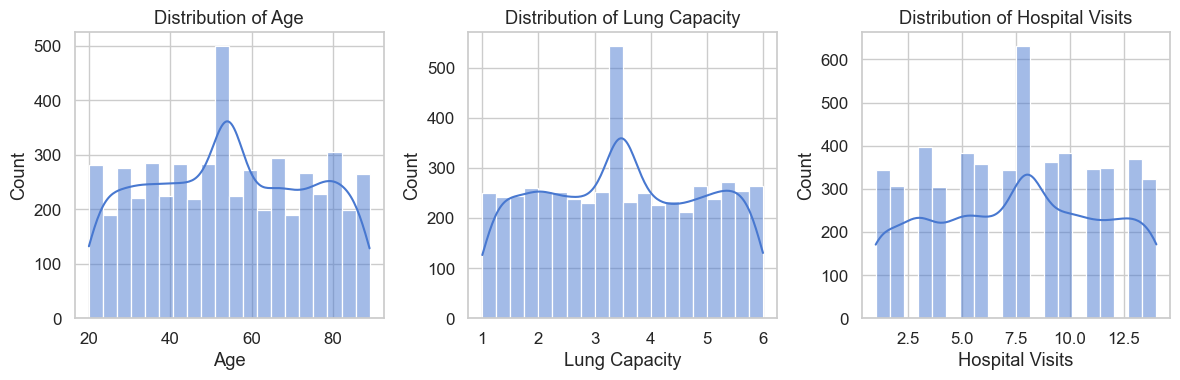

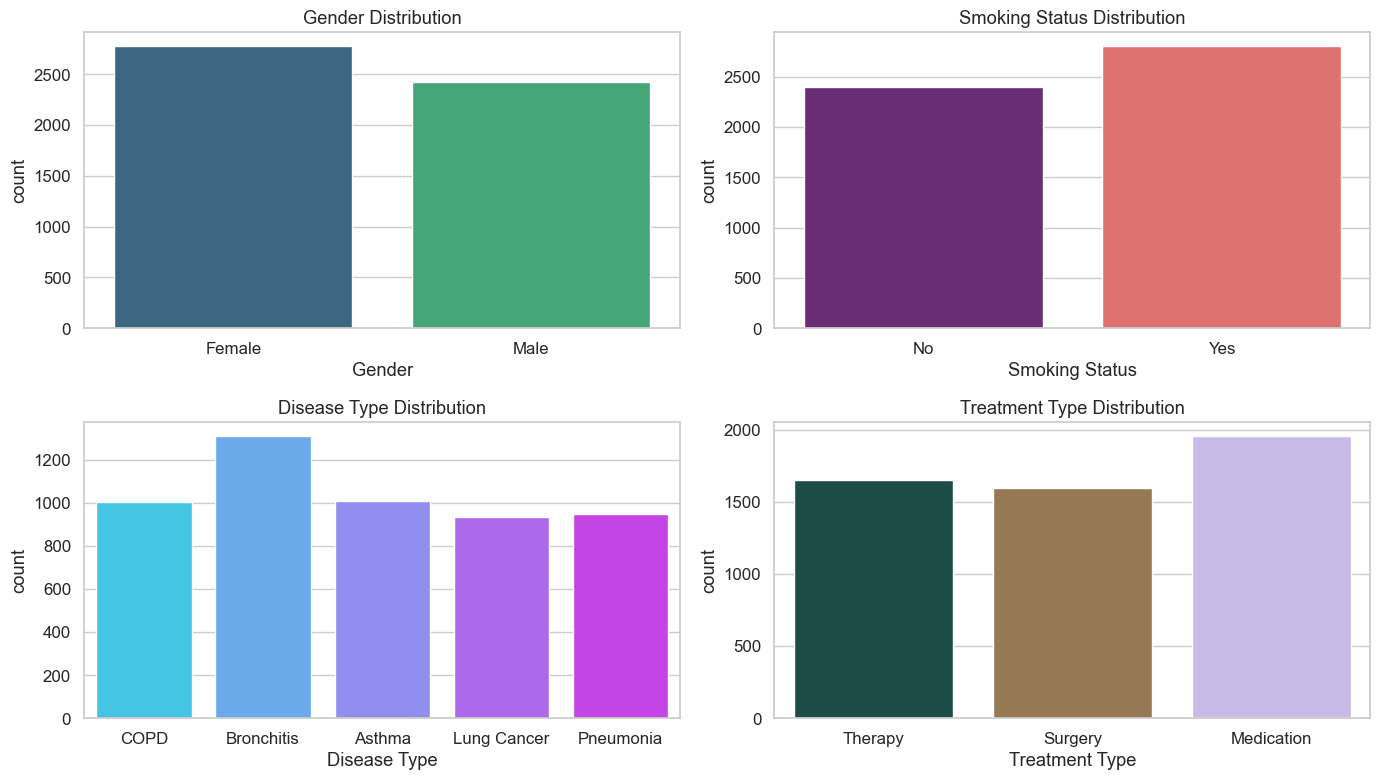

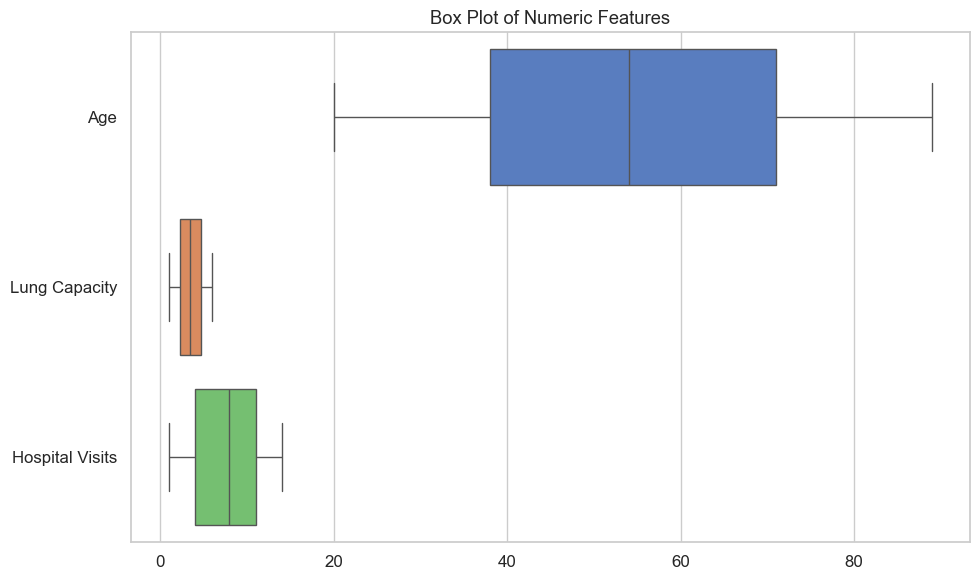

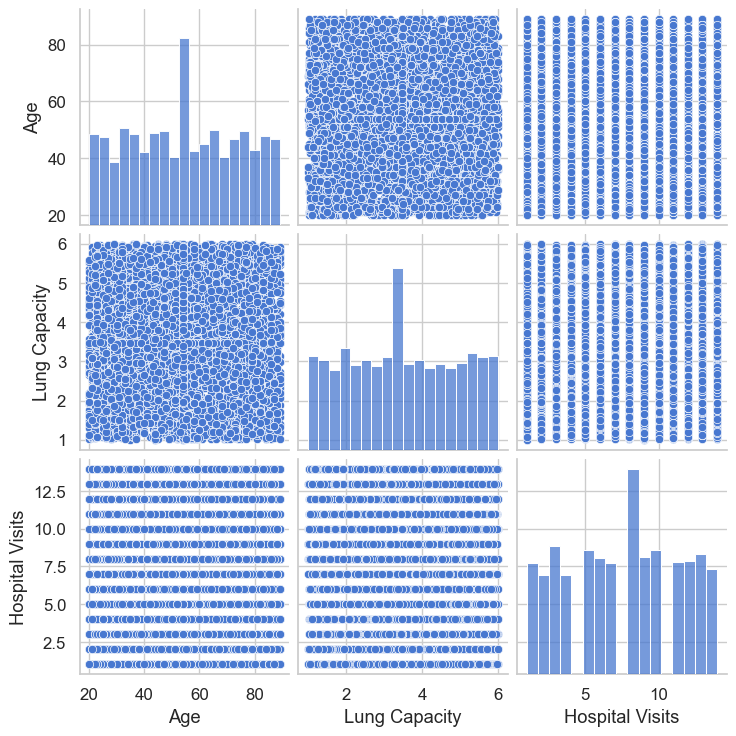

In [100]:
# 繪製數值類型的直方圖
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 繪製類別類型的計數圖
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Smoking Status', data=df, palette='magma')
plt.title('Smoking Status Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Disease Type', data=df, palette='cool')
plt.title('Disease Type Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Treatment Type', data=df, palette='cubehelix')
plt.title('Treatment Type Distribution')

plt.tight_layout() #自動調整子圖之間的間距
plt.show()

# 繪製箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], orient='h') #將數值型特徵的數據作為箱型圖的輸入
plt.title('Box Plot of Numeric Features')
plt.tight_layout()
plt.show()

# 繪製配對圖，顯示兩兩之間的關係
sns.pairplot(df[numeric_cols])
plt.show()




## Step5 訓練模型

In [112]:
label_mappings={}
def encoder(col):
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # 直接修改 DataFrame
    label_mappings[col] = {index: label for index, label in enumerate(encoder.classes_)}  # 存對應表
   

# 將類別型資料 (文字標籤) 轉換成數字
encoder('Gender')
encoder('Smoking Status')
encoder('Disease Type')
encoder('Treatment Type')
print("encoded df")
print(df)

# 定義訓練欄位跟目標欄位
df_train = df.drop(['Recovered','Recovered_binary'],axis=1)
print("df_train: ")
print(df_train)
X = df_train
y = df['Recovered_binary']

# 將數據分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


# 使用logistic regression來訓練模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 預測結果
y_pred = model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy: {:.2f}%'.format(accuracy * 100))



encoded df
       Age  Gender  Smoking Status  Lung Capacity  Disease Type  \
0     71.0       0               0           4.49             2   
1     34.0       0               1           3.48             1   
2     80.0       1               1           1.95             2   
3     40.0       0               1           3.48             1   
4     43.0       1               1           4.60             2   
...    ...     ...             ...            ...           ...   
5195  40.0       1               0           1.43             3   
5196  21.0       0               1           1.50             2   
5197  42.0       0               0           5.53             4   
5198  82.0       1               0           3.68             1   
5199  45.0       0               1           3.79             4   

      Treatment Type  Hospital Visits Recovered  Recovered_binary  
0                  2             14.0       Yes                 1  
1                  1              7.0        No 

## Step6 繪製結果

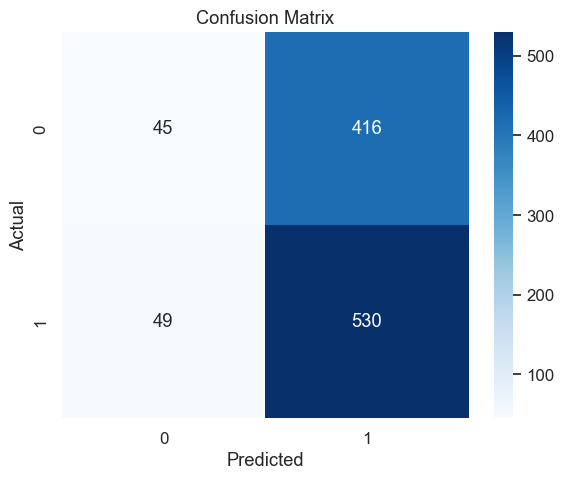

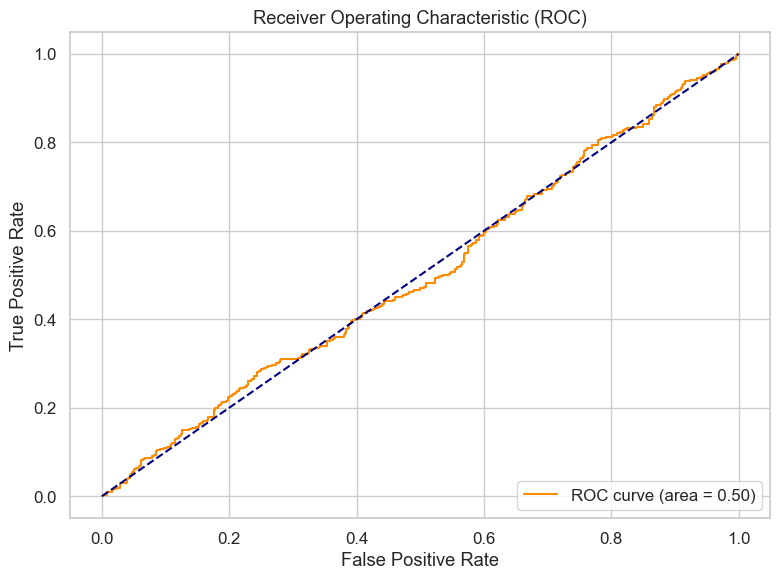

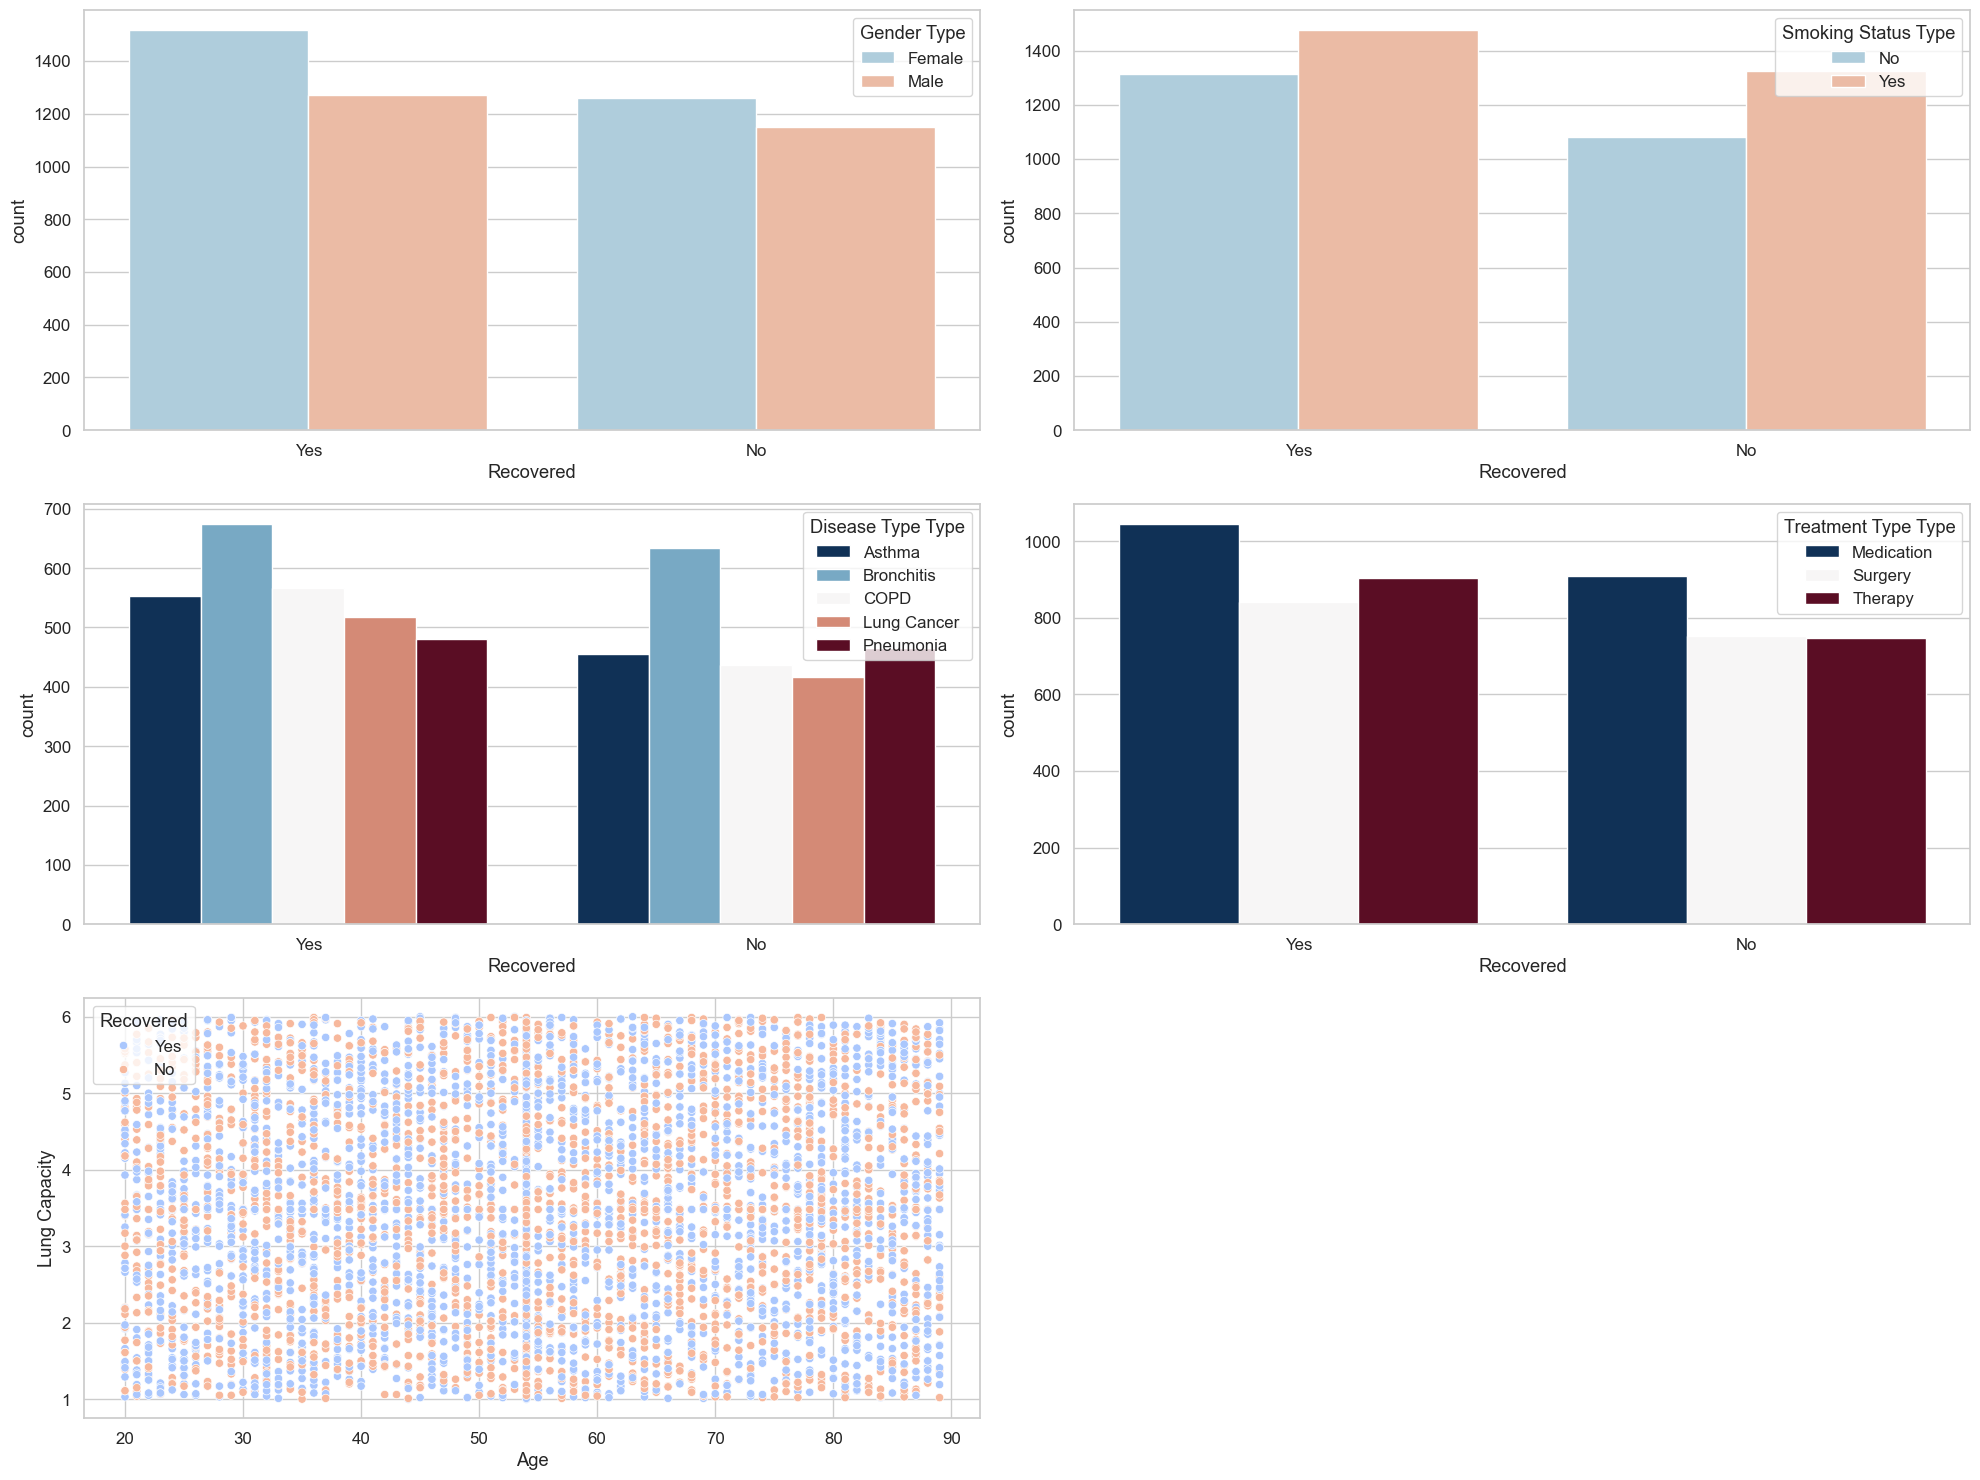

In [105]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Compute ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 用圖表來觀察特徵與目標(Recovered)的關係

def gen( col, r, c ):
    for i in range(len(col)):
        plt.subplot(r, c, i+1)
        ax = sns.countplot(x='Recovered',hue=col[i],data=df,palette='RdBu_r')
        handles, labels = ax.get_legend_handles_labels()
        new_labels = [label_mappings[col[i]][int(label)] for label in labels]  # 轉換數字為文字
        ax.legend(handles, new_labels, title='{} Type'.format(col[i]))


plt.figure(figsize=(20, 15))
col = ['Gender','Smoking Status','Disease Type','Treatment Type']
gen(col,3,2)
plt.subplot(3, 2, 5)
sns.scatterplot(x="Age", y="Lung Capacity", hue="Recovered", data=df, palette="coolwarm")
plt.tight_layout() #自動調整子圖之間的間距
plt.show()